In [1]:
import h5py
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import librosa
import utils
from tqdm import tqdm
import matplotlib.pyplot as plt

Number of Events: 4599
Shape: (3, 2500), Dtype: float64


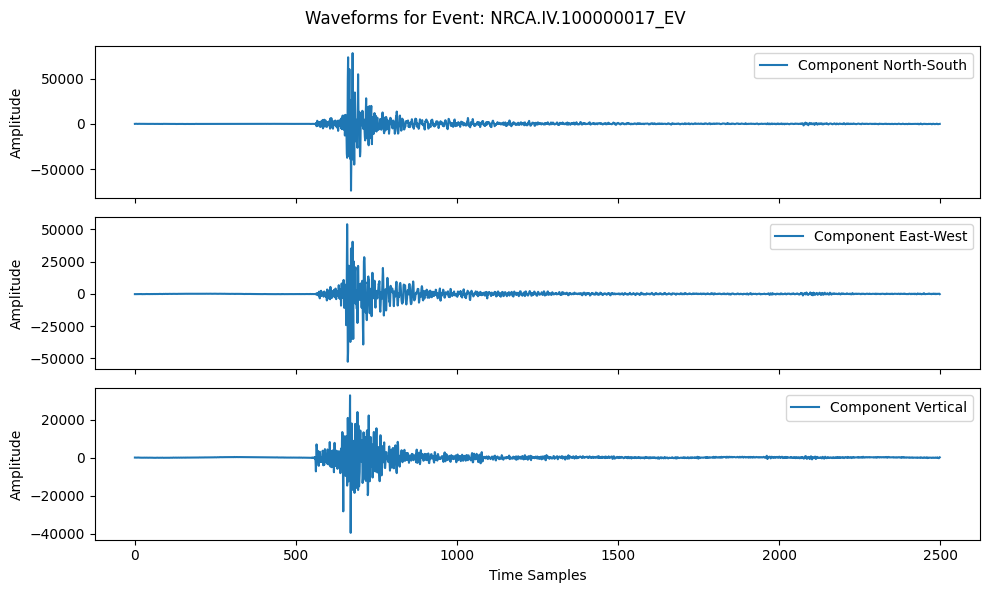

AttributeError: module 'utils' has no attribute 'compute_log_spectrograms'

In [ ]:
# Open the HDF5 file
file_path = r"E:\EQML Project\data\dataset\NRCA\NRCA_waveforms_pre.hdf5"  # Replace with the path to your file
with h5py.File(file_path, 'r') as hdf:
    # List all events in the HDF5 file
    events = list(hdf.keys())
    print(f"Number of Events: {len(events)}")
    
    # Access the first event
    event = events[0]  # Take the first waveform
    waveforms = hdf[event]  # Access the dataset for this event
    
    # Check the shape and details of the dataset
    print(f"Shape: {waveforms.shape}, Dtype: {waveforms.dtype}")
    # Shape should be (3, 2500), Dtype: float64 for three components

    # Plot the waveforms
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    component_names = ['North-South', 'East-West', 'Vertical']
    
    for i in range(3):
        axes[i].plot(waveforms[i], label=f"Component {component_names[i]}")
        axes[i].set_ylabel("Amplitude")
        axes[i].legend(loc="upper right")
    
    axes[-1].set_xlabel("Time Samples")
    plt.suptitle(f"Waveforms for Event: {event}")
    plt.tight_layout()
    plt.show()

    # Create a three-channel spectrogram
    spectrograms = utils.compute_spectrograms(waveforms)
    log_spectrograms = utils.compute_log_spectrograms(waveforms)
    # Assuming utils.compute_spectrograms returns a 3D array (components, frequency_bins, time_frames)
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

    for i in range(3):
        axes[i].imshow(spectrograms[i], aspect='auto', cmap='inferno', origin='lower')
        axes[i].set_ylabel("Frequency Bins")
        axes[i].set_title(f"Spectrogram for Component {component_names[i]}")

    axes[-1].set_xlabel("Time Frames")
    plt.suptitle(f"Spectrograms for Event: {event}")
    plt.tight_layout()
    plt.show()

    # Assuming utils.compute_log_spectrograms returns a 3D array (components, frequency_bins, time_frames)
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

    for i in range(3):
        axes[i].imshow(log_spectrograms[i], aspect='auto', cmap='inferno', origin='lower')
        axes[i].set_ylabel("Frequency Bins")
        axes[i].set_title(f"Log Spectrogram for Component {component_names[i]}")

    axes[-1].set_xlabel("Time Frames")
    plt.suptitle(f"Log Spectrograms for Event: {event}")
    plt.tight_layout()
    plt.show()

